# Non Linear Regression Analysis

### Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Linear Regression

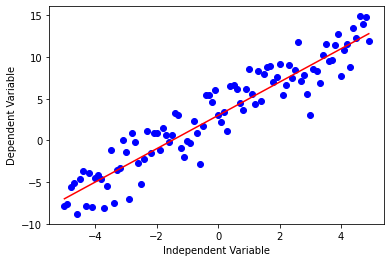

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## 2. Non-Linear Regression

Non-linear regressions are a relationship between independent variables  𝑥  and a dependent variable  𝑦  which result in a non-linear function modeled data. 

#### Cubic Function's Graph

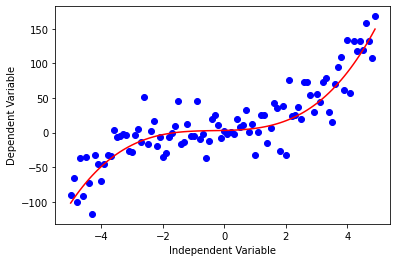

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Quadratic

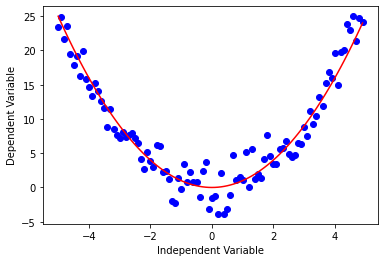

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Exponential

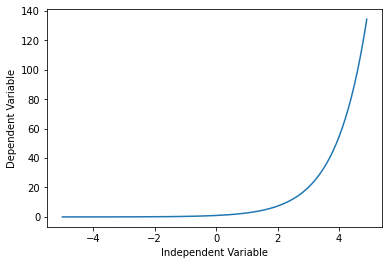

In [7]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Logarithmic

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


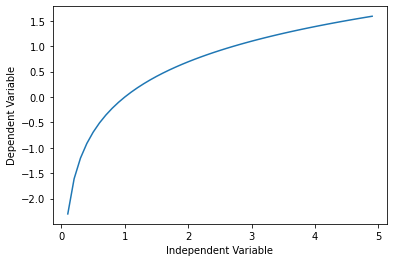

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.log(x)

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Sigmoidal/ Logistic

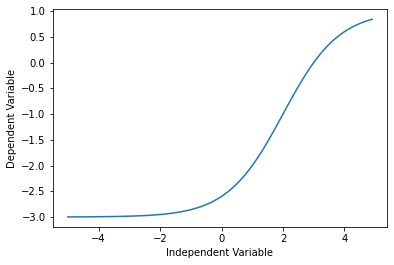

In [9]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1-4/(1+np.power(3, x-2))

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Non-Linear Regression Example

For an example, a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014 below

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("china_gdp.csv")

In [7]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the Dataset

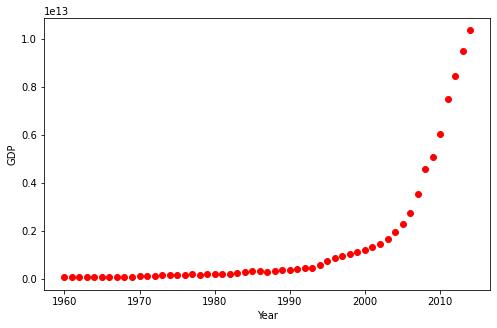

In [8]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally it deaccelerates slightly in the 2010s.

### Choosing a Model

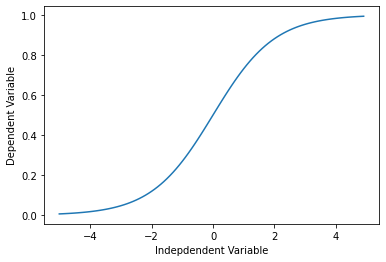

In [9]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building The Model

In [10]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:

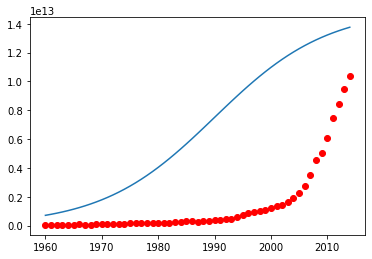

In [11]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [12]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

### Find the Best Parameters for Our Fit Line

In [13]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


### Plot the Result of Regression Model

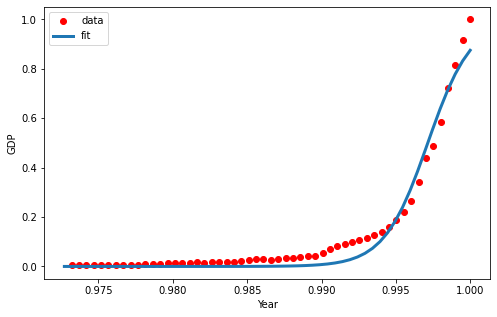

In [16]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))

y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Split Data into Tran/ Test

In [17]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.96


### Build the Model using Train Set

In [18]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)

### Predict using Test Set

In [19]:
y_hat = sigmoid(test_x, *popt)

### Evaluation

In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.96
